### Purpse of this study is to come up with a model that would predict if an employee wold leave the company or not.

#### I will be experimenting with different classification models to predict if the employee will leave the company or not

In [321]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [322]:
# reading the file

data=pd.read_csv("https://raw.githubusercontent.com/AkhilaShanbhag/Attrition-dataset/main/attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [323]:
df=data.copy()

In [324]:
# replacing the categorical string values with categorical numeric values

df.OverTime.replace(["Yes","No"],[1,0],inplace=True)
df.Department.replace(["Human Resources","Research & Development","Sales"],[1,2,3],inplace=True)
df.BusinessTravel.replace(["Non-Travel","Travel_Frequently","Travel_Rarely"],[1,2,3],inplace=True)
df.EducationField.replace(["Human Resources","Life Sciences","Marketing","Medical","Other","Technical Degree"],[1,2,3,4,5,6],inplace=True)
df.Gender.replace(["Male","Female"],[1,0],inplace=True)
df.MaritalStatus.replace(["Divorced","Married","Single"],[1,2,3],inplace=True)
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,3,3,2,2,0,3,2,4,3,5993,1,8,1,6,4,0,5,1
1,49,0,2,2,2,3,1,2,2,2,2,5130,0,10,3,10,7,1,7,8
2,37,1,3,2,5,4,1,2,1,3,3,2090,1,7,3,0,0,0,0,2
3,33,0,2,2,2,4,0,3,1,3,2,2909,1,8,3,8,7,3,0,3
4,27,0,3,2,4,1,1,3,1,2,2,3468,0,6,3,2,2,2,2,2


In [325]:
df.shape

(1470, 20)

In [326]:
df

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,3,3,2,2,0,3,2,4,3,5993,1,8,1,6,4,0,5,1
1,49,0,2,2,2,3,1,2,2,2,2,5130,0,10,3,10,7,1,7,8
2,37,1,3,2,5,4,1,2,1,3,3,2090,1,7,3,0,0,0,0,2
3,33,0,2,2,2,4,0,3,1,3,2,2909,1,8,3,8,7,3,0,3
4,27,0,3,2,4,1,1,3,1,2,2,3468,0,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,2,4,3,1,4,2,4,2,2571,0,17,3,5,2,0,3,23
1466,39,0,3,2,4,4,1,2,3,1,2,9991,0,9,3,7,7,1,7,6
1467,27,0,3,2,2,2,1,4,2,2,2,6142,1,6,3,6,2,0,3,4
1468,49,0,2,3,4,4,1,2,2,2,2,5390,0,17,2,9,6,0,8,2


In [327]:
# splitting the data in to predictors and target

df_y=df.Attrition
df_x=df.drop("Attrition",axis=1)

In [328]:
# splitting the data into train and test
train_x,test_x,train_y,test_y=train_test_split(df_x,df_y,test_size=0.15,stratify=df_y)
len(train_x),len(train_y),len(test_x),len(test_y)

(1249, 1249, 221, 221)

In [329]:
# splitting the train data into train and validation data
train_x,valid_x,train_y,valid_y=train_test_split(train_x,train_y,test_size=0.15,stratify=train_y)
len(train_x),len(train_y),len(valid_x),len(valid_y)


(1061, 1061, 188, 188)

### Model Building:

### Experiment 1:
- Finding the optimal depth of the tree that would classify the observations as accurately as possible.

#### I will be using cross validation using 10 k folds.

#### I will be using f1 as my evaluation metric as the dataset is highly imbalanced.

In [260]:
# writing a loop to find the optimal max_depth

depth=range(1,25)
f1=[]

for i in depth:
    dt=DecisionTreeClassifier(max_depth=i,min_samples_leaf=10,criterion='gini')
    fit=dt.fit(train_x,train_y)
    score=cross_val_score(dt,train_x,train_y,cv=10,scoring='f1')
    f1.append(score.mean())



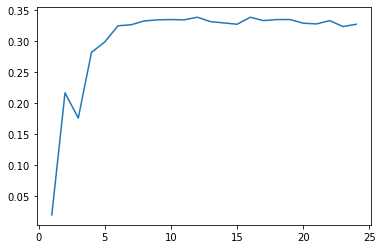

In [261]:
# Plotting to find the optimal depth

plt.plot(depth,f1)

In [269]:
np.max(f1),f1[11:12]

(0.3390088963996083, [0.3390088963996083])

### k=11 is the depth that gives highest f1 score of 0.34 with min_samples_leaf=10 on training data.

### This is bad model as f1 score is very low

### Experiment 2:
-Using grid search CV to find the optimal depth and min_samples_leaf for the tree

In [270]:
# Importing libraries

from sklearn.model_selection import GridSearchCV

# using GridSearchCV fro cross validation
dtree= DecisionTreeClassifier()

# MAE
gs1=GridSearchCV(dtree,param_grid={"max_depth":range(1,25),"min_samples_leaf":range(10,60,10)},cv=10,
                scoring='f1')

# fitting grid search
gs1.fit(train_x,train_y)

print(gs1.best_params_)
print(gs1.best_score_)
model1_f1=gs1.best_score_

{'max_depth': 14, 'min_samples_leaf': 10}
0.3390088963996083


#### f1 score did not improve.

In [271]:
# checking on validation data
dtree=DecisionTreeClassifier(max_depth=8,min_samples_leaf=20)
model=dtree.fit(train_x,train_y)
pred=fit.predict(valid_x)

# accuracy score
f1_score(np.array(valid_y),pred),accuracy_score(np.array(valid_y),pred)

(0.4444444444444445, 0.8404255319148937)

In [272]:
# confusion matrix
confusion_matrix(valid_y,pred)

array([[146,  12],
       [ 18,  12]])

### This model would give f1 score of 0.44 on the validation dataset with only 40 misclassifications.

### Experiment 3:
- Let's try bagging model and see if accuracy increases.

In [273]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# fitting bagged model

model=BaggingClassifier(base_estimator=None,oob_score=True)
fit=model.fit(train_x,train_y)
pred=fit.predict(valid_x)

# finding the ccuracy score of the model
f1_score(np.array(valid_y),pred),accuracy_score(np.array(valid_y),pred)


(0.4651162790697674, 0.8776595744680851)

In [274]:
# confusion matrix
confusion_matrix(valid_y,pred)

array([[155,   3],
       [ 20,  10]])

#### Bagged model with default settings would give f1 score of 0.46 with just 23 misclassifications.

In [275]:
# Bagged model with hypertuned tree

# fitting bagged model

model=BaggingClassifier(base_estimator=dtree,n_estimators=1000,oob_score=True)
fit=model.fit(train_x,train_y)
pred=fit.predict(valid_x)

# finding the ccuracy score of the model
f1_score(np.array(valid_y),pred),accuracy_score(np.array(valid_y),pred)


(0.2777777777777778, 0.8617021276595744)

In [276]:
# confusion matrix
confusion_matrix(valid_y,pred)

array([[157,   1],
       [ 25,   5]])

#### Bagged model with hypertuned tree would give f1 score of 0.28 with just 26 misclassifications.

### Experiment 4:
- Let's try randon forest model

In [282]:
from sklearn.ensemble import RandomForestClassifier

#fitting random forest model and predicting on train data
rf = RandomForestClassifier(n_estimators = 1000, oob_score=True, max_features=1, n_jobs=-1)
rf.fit(train_x,train_y)
y_pred=rf.predict(valid_x)
f1_score(np.array(valid_y),y_pred),accuracy_score(np.array(valid_y),y_pred)

(0.33333333333333337, 0.8723404255319149)

In [283]:
# confusion matrix
confusion_matrix(valid_y,y_pred)

array([[158,   0],
       [ 24,   6]])

#### Random Forest model would give  f1 score of 0.33 with 24 misclassifications.

### Upsampling the minority class in the train dataset

### Experiment 5:

In [284]:
# using the upsample technique to balance the train data

df_train=train_x
df_train["Attrition"]=pd.DataFrame(train_y)["Attrition"]

from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['Attrition']==0)] 
df_minority = df_train[(df_train['Attrition']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,n_samples=890)
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [285]:
df_upsampled["Attrition"].value_counts()

1    890
0    890
Name: Attrition, dtype: int64

In [286]:
upsampled_train_y=df_upsampled.Attrition
upsampled_train_x=df_upsampled.drop("Attrition",axis=1)

In [296]:
# Let's fit a bagged model on this new dataset

# fitting bagged model

model=BaggingClassifier(base_estimator=dtree,n_estimators=1000,oob_score=True)
fit=model.fit(upsampled_train_x,upsampled_train_y)
pred=fit.predict(valid_x)

# finding the ccuracy score of the model
f1_score(np.array(valid_y),pred),accuracy_score(np.array(valid_y),pred)


(0.5428571428571427, 0.8297872340425532)

In [288]:
# confusion matrix
confusion_matrix(valid_y,pred)

array([[136,  22],
       [ 11,  19]])

### Even though this model has misclassified 33 observations, the correctly classified minority class is increased.

In [308]:
#fitting random forest model and predicting on upsampled train data
rf = RandomForestClassifier(n_estimators = 1000, oob_score=True)
rf.fit(upsampled_train_x,upsampled_train_y)
y_pred=rf.predict(valid_x)
f1_score(np.array(valid_y),y_pred),accuracy_score(np.array(valid_y),y_pred)

(0.4651162790697674, 0.8776595744680851)

In [309]:
# confusion matrix
confusion_matrix(valid_y,y_pred)

array([[155,   3],
       [ 20,  10]])

### This is the best model that we have got so far.

In [336]:
# Testing on the test data

rf.fit(upsampled_train_x,upsampled_train_y)
y_pred=rf.predict(test_x)
f1_score(np.array(test_y),y_pred),accuracy_score(np.array(test_y),y_pred)


(0.9411764705882353, 0.9819004524886877)

### Randon forest model is showing high variance on the training and validation data and low variance on the test data.

### Even though the results on test data are good, this model is not stable.